# odm2api demo with Little Bear SQLite sample DB
Largely from https://github.com/ODM2/ODM2PythonAPI/blob/master/Examples/Sample.py   
- 4/25/2016. Started testing with the new `odm2` conda channel, based on the new `0.5.0-alpha` odm2api release. See my `odm2api_odm2channel` env. Ran into problems b/c the SQLite database needed to be updated to have a `SamplingFeature.FeatureGeometryWKT` field; so I added and populated it manually with `SQLite Manager`.
- 2/7/2016. Tested successfully with `sfgeometry_em_1` branch, with my overhauls. Using `odm2api_dev` env.
- 2/1 - 1/31. Errors with SamplingFeatures code, with latest odm2api from master (on env `odm2api_jan31test`). *The code also fails the same way with the `odm2api` env, but it does still run fine with the `odm2api_jan21` env! I'm investigating the differences between those two envs.*
- 1/22-20,9/2016.

Author: Emilio Mayorga

### Create a connection to the ODM2 database

In [1]:
import os
from odm2api.ODMconnection import dbconnection


odm2db_fpth = os.path.join('data', 'ODM2.sqlite')
session_factory = dbconnection.createConnection('sqlite', odm2db_fpth, 2.0)

### Read the database

In [2]:
from odm2api.ODM2.services.readService import ReadODM2


read = ReadODM2(session_factory)

### Run some basic sample queries

In [3]:
allVars = read.getVariables()

for x in allVars:
    print("{}: {}".format(x.VariableCode, x.VariableNameCV))

USU36: Temperature


### Read some metadata from the database: people and affiliation

In [4]:
allPeople = read.getPeople()

if allPeople:
    for x in allPeople:
        print("{} {}".format(x.PersonFirstName, x.PersonLastName))
        
allaff = read.getAffiliations()

if allaff:
    for x in allaff:
        print("{}: {}".format(x.PersonObj.PersonFirstName, x.OrganizationID))

Jeff Horsburgh
Jeff: 1


## SamplingFeatures tests

### Get all of the SamplingFeatures from the database that are Sites

In [5]:
try:
    siteFeatures = read.getSamplingFeatures(type='Site')
    numSites = len(siteFeatures)
    for x in siteFeatures:
        print x.SamplingFeatureCode + ": " + x.SamplingFeatureName
except Exception as e:
    print("Unable to demo getSamplingFeatures(type='Site')\n{}".format(e))

USU-LBR-Mendon: Little Bear River at Mendon Road near Mendon, Utah


In [6]:
read.getSamplingFeatures()

[<Sites({'SamplingFeatureDescription': None, '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fd7d70afd90>, 'SamplingFeatureGeotypeCV': u'Point', 'SamplingFeatureName': u'Little Bear River at Mendon Road near Mendon, Utah', 'SamplingFeatureUUID': u'938e328c-0e38-11e6-819c-f45c8999816f', 'Elevation_m': 1345.0, 'ElevationDatumCV': u'NGVD29', 'SamplingFeatureTypeCV': u'Site', 'SamplingFeatureCode': u'USU-LBR-Mendon', 'SamplingFeatureID': 1, 'FeatureGeometryWKT': u'POINT (-111.946402 41.718473)'})>]

In [7]:
read.getSamplingFeatures(codes=['USU-LBR-Mendon'])

[<Sites({'SamplingFeatureDescription': None, '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fd7d70afd90>, 'SamplingFeatureGeotypeCV': u'Point', 'SamplingFeatureName': u'Little Bear River at Mendon Road near Mendon, Utah', 'SamplingFeatureUUID': u'938e328c-0e38-11e6-819c-f45c8999816f', 'Elevation_m': 1345.0, 'ElevationDatumCV': u'NGVD29', 'SamplingFeatureTypeCV': u'Site', 'SamplingFeatureCode': u'USU-LBR-Mendon', 'SamplingFeatureID': 1, 'FeatureGeometryWKT': u'POINT (-111.946402 41.718473)'})>]

### Now get the SamplingFeature object for a SamplingFeature code

In [8]:
sf_lst = read.getSamplingFeatures(codes=['USU-LBR-Mendon'])

vars(sf_lst[0])

{'ElevationDatumCV': u'NGVD29',
 'Elevation_m': 1345.0,
 'FeatureGeometryWKT': u'POINT (-111.946402 41.718473)',
 'SamplingFeatureCode': u'USU-LBR-Mendon',
 'SamplingFeatureDescription': None,
 'SamplingFeatureGeotypeCV': u'Point',
 'SamplingFeatureID': 1,
 'SamplingFeatureName': u'Little Bear River at Mendon Road near Mendon, Utah',
 'SamplingFeatureTypeCV': u'Site',
 'SamplingFeatureUUID': u'938e328c-0e38-11e6-819c-f45c8999816f',
 '_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fd7d70afd90>}

In [9]:
sf = sf_lst[0]

sf

<Sites({'SamplingFeatureDescription': None, '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fd7d70afd90>, 'SamplingFeatureGeotypeCV': u'Point', 'SamplingFeatureName': u'Little Bear River at Mendon Road near Mendon, Utah', 'SamplingFeatureUUID': u'938e328c-0e38-11e6-819c-f45c8999816f', 'Elevation_m': 1345.0, 'ElevationDatumCV': u'NGVD29', 'SamplingFeatureTypeCV': u'Site', 'SamplingFeatureCode': u'USU-LBR-Mendon', 'SamplingFeatureID': 1, 'FeatureGeometryWKT': u'POINT (-111.946402 41.718473)'})>

In [10]:
print(type(sf))

print(type(sf.FeatureGeometryWKT), sf.FeatureGeometryWKT)

<class 'odm2api.ODM2.models.Sites'>
(<type 'unicode'>, u'POINT (-111.946402 41.718473)')


In [11]:
table = """
<!DOCTYPE html>
<html>
<head>
<style>
table {{
    width:100%;
}}
table, th, td {{
    border: 1px solid black;
    border-collapse: collapse;
}}
th, td {{
    padding: 5px;
    text-align: left;
}}
table#t01 tr:nth-child(odd) {{
    background-color: #eee;
}}
table#t01 tr:nth-child(even) {{
   background-color:#fff;
}}
</style>
</head>
<body>

<table id="t01">
  <tr>
    <td>Code</td>
    <td>{}</td>
  </tr>
  <tr>
    <td>TypeCV</td>
    <td>{}</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>{}</td>
  </tr>
</table>
</body>
</html>
""".format

In [12]:
import folium

lon, lat = sf.Longitude, sf.Latitude

m = folium.Map(location=[lat, lon], zoom_start=16)

icon = folium.Icon(color='orange', icon='info-sign', prefix='glyphicon')

width, height = 310, 130
html = table(sf.SamplingFeatureCode, sf.SamplingFeatureTypeCV, sf.SamplingFeatureName)
iframe = folium.IFrame(html, width=width, height=height)
popup = folium.Popup(iframe)

folium.Marker(location=[lat, lon], icon=icon, popup=popup).add_to(m)

m

## Back to the rest of the demo

In [13]:
read.getResults()

[<TimeSeriesResults({'ResultUUID': u'938fec1c-0e38-11e6-98c2-f45c8999816f', 'ValidDateTimeUTCOffset': None, '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fd7d6cdf090>, 'VariableID': 1, 'ProcessingLevelID': 1, 'StatusCV': u'Unknown', 'ValueCount': 24206, 'ValidDateTime': None, 'UnitsID': 96, 'FeatureActionID': 1, 'ResultDateTimeUTCOffset': -7, 'TaxonomicClassifierID': None, 'ResultTypeCV': u'Time series coverage', 'SampledMediumCV': u'Surface Water', 'ResultDateTime': datetime.datetime(2016, 4, 29, 12, 31, 23, 801947), 'ResultID': 1})>]

In [14]:
firstResult = read.getResults()[0]
firstResult.FeatureActionObj.ActionObj

<Actions({'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fd7d6cf0850>, 'MethodID': 1, 'ActionDescription': u'An observation action that generated a time series result.', 'ActionFileLink': None, 'EndDateTime': datetime.datetime(2009, 1, 16, 12, 30), 'BeginDateTime': datetime.datetime(2007, 8, 16, 16, 30), 'EndDateTimeUTCOffset': -7, 'ActionTypeCV': u'Observation', 'ActionID': 1, 'BeginDateTimeUTCOffset': -7})>

### Foreign Key Example

Drill down and get objects linked by foreign keys

In [15]:
try:
    # Call getResults, but return only the first result.
    firstResult = read.getResults()[0]
    action_firstResult = firstResult.FeatureActionObj.ActionObj
    print("The FeatureAction object for the Result is: {}".format(firstResult.FeatureActionObj))
    print("The Action object for the Result is: {}".format(action_firstResult))
    print("\nThe following are some of the attributes for the Action that created the Result: \n" +
          "ActionTypeCV: " + action_firstResult.ActionTypeCV + "\n" +
          "ActionDescription: " + action_firstResult.ActionDescription + "\n" +
          "BeginDateTime: " + str(action_firstResult.BeginDateTime) + "\n" +
          "EndDateTime: " + str(action_firstResult.EndDateTime) + "\n" +
          "MethodName: " + action_firstResult.MethodObj.MethodName + "\n" +
          "MethodDescription: " + action_firstResult.MethodObj.MethodDescription)
except Exception as e:
    print("Unable to demo Foreign Key Example: {}".format(e))

The FeatureAction object for the Result is: <FeatureActions({'FeatureActionID': 1, 'SamplingFeatureID': 1, '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fd7d6cdf6d0>, 'ActionID': 1})>
The Action object for the Result is: <Actions({'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fd7d6cf0850>, 'MethodID': 1, 'ActionDescription': u'An observation action that generated a time series result.', 'ActionFileLink': None, 'EndDateTime': datetime.datetime(2009, 1, 16, 12, 30), 'BeginDateTime': datetime.datetime(2007, 8, 16, 16, 30), 'EndDateTimeUTCOffset': -7, 'ActionTypeCV': u'Observation', 'ActionID': 1, 'BeginDateTimeUTCOffset': -7})>

The following are some of the attributes for the Action that created the Result: 
ActionTypeCV: Observation
ActionDescription: An observation action that generated a time series result.
BeginDateTime: 2007-08-16 16:30:00
EndDateTime: 2009-01-16 12:30:00
MethodName: Quality Control Level 1 Data Series created from r

### Example of Retrieving Attributes of a Time Series Result using a ResultID

In [16]:
tsResult = read.getResults(ids=[1])[0]

type(tsResult), vars(tsResult)

(odm2api.ODM2.models.TimeSeriesResults,
 {'FeatureActionID': 1,
  'FeatureActionObj': <FeatureActions({'FeatureActionID': 1, 'SamplingFeatureID': 1, '_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x7fd7d6cdf6d0>, 'ActionID': 1})>,
  'ProcessingLevelID': 1,
  'ResultDateTime': datetime.datetime(2016, 4, 29, 12, 31, 23, 801947),
  'ResultDateTimeUTCOffset': -7,
  'ResultID': 1,
  'ResultTypeCV': u'Time series coverage',
  'ResultUUID': u'938fec1c-0e38-11e6-98c2-f45c8999816f',
  'SampledMediumCV': u'Surface Water',
  'StatusCV': u'Unknown',
  'TaxonomicClassifierID': None,
  'UnitsID': 96,
  'ValidDateTime': None,
  'ValidDateTimeUTCOffset': None,
  'ValueCount': 24206,
  'VariableID': 1,
  '_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fd7d6cdf090>})

**Why are `ProcessingLevelObj`, `VariableObj` and `UnitsObj` objects not shown in the above `vars()` listing!?** They **are** actually available, as demonstrated in much of the code below.

In [17]:
try:
    tsResult = read.getResults(ids=[1])[0]
    # Get the site information by drilling down.
    sf_tsResult = tsResult.FeatureActionObj.SamplingFeatureObj
    print('Some of the attributes for the TimeSeriesResult retrieved using getResults(ids=[]): \n' +
          'ResultTypeCV: ' + tsResult.ResultTypeCV + '\n' +
          # Get the ProcessingLevel from the TimeSeriesResult's ProcessingLevel object.
          'ProcessingLevel: ' + tsResult.ProcessingLevelObj.Definition + '\n' +
          'SampledMedium: ' + tsResult.SampledMediumCV + '\n' +
          # Get the variable information from the TimeSeriesResult's Variable object.
          'Variable: ' + tsResult.VariableObj.VariableCode + ': ' + tsResult.VariableObj.VariableNameCV + '\n' +
          'AggregationStatistic: ' + tsResult.AggregationStatisticCV + '\n' +
          # Get the site information by drilling down.
          'Elevation_m: ' + str(sf_tsResult.Elevation_m) + '\n' +
          'SamplingFeature: ' + sf_tsResult.SamplingFeatureCode + ' - ' +
          sf_tsResult.SamplingFeatureName)
except Exception as e:
    print('Unable to demo Example of retrieving Attributes of a time Series Result: {}'.format(e))

Some of the attributes for the TimeSeriesResult retrieved using getResults(ids=[]): 
ResultTypeCV: Time series coverage
ProcessingLevel: Quality controlled data
SampledMedium: Surface Water
Variable: USU36: Temperature
AggregationStatistic: Average
Elevation_m: 1345.0
SamplingFeature: USU-LBR-Mendon - Little Bear River at Mendon Road near Mendon, Utah


### Example of Retrieving Time Series Result Values, then plotting them

In [18]:
tsValues = read.getResultValues(resultids=[1])  # Get the values for a particular TimeSeriesResult.

tsValues.set_index('valuedatetime', inplace=True)

tsValues.head()  # Return type is a pandas dataframe.

,valueid,resultid,datavalue,valuedatetimeutcoffset,censorcodecv,qualitycodecv,timeaggregationinterval,timeaggregationintervalunitsid
valuedatetime,,,,,,,,
2009-01-04 18:00:00,23641,1,-0.268333,-7,nc,Unknown,30.0,102
2009-01-04 06:00:00,23617,1,-0.266667,-7,nc,Unknown,30.0,102
2008-12-18 01:00:00,22922,1,-0.263333,-7,nc,Unknown,30.0,102
2009-01-04 05:30:00,23616,1,-0.263333,-7,nc,Unknown,30.0,102
2009-01-04 06:30:00,23618,1,-0.263333,-7,nc,Unknown,30.0,102


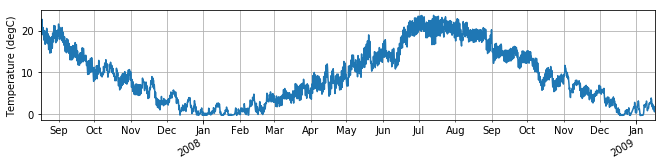

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import dates

fig, ax = plt.subplots(figsize=(11, 2.25))
tsValues['datavalue'].plot(ax=ax)

ax.set_ylabel('{} ({})'.format(
    tsResult.VariableObj.VariableNameCV,
    tsResult.UnitsObj.UnitsAbbreviation))
ax.set_xlabel('')
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))
ax.xaxis.set_major_locator(dates.YearLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n%Y'))
ax.grid(which='major', axis='y')
ax.grid(which='minor', axis='x')